# Linear Regression using Python

First, we will change the location in which the python notebook is open.

In [1]:
import os

In [2]:
# Chechking the location in which the notebook is currently running
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python\\01. Linear Regression'

In [3]:
# Going back to the previous directory
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python'

### **Problem Statement**: 

>**Question:** ACME Insurance Inc. offers affordable health insurance to thousands of customers all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits, and region of residence.

#### Downloading the data

In [5]:
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [6]:
from urllib.request import urlretrieve

In [7]:
urlretrieve(medical_charges_url, "Dataset/medical.csv")

('Dataset/medical.csv', <http.client.HTTPMessage at 0x199edd174d0>)

In [8]:
import pandas as pd

In [9]:
medical_df = pd.read_csv("Dataset/medical.csv")

In [10]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

In [12]:
# Here are some statistics for the numerical columns:

medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Exploratory Analysis and Visualization

In [13]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [14]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

##### Age

In [15]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [16]:
fig = px.histogram(
    medical_df,
    x = "age",
    marginal = "box",
    nbins = 47,
    title = "Distribution of Age"
)

fig.update_layout(bargap = 0.1)
fig.show()

##### Body Mass Index

In [17]:
fig = px.histogram(
    data_frame = medical_df,
    x = "bmi",
    marginal = "box",
    color_discrete_sequence = ["red"],
    title = "Distribution of Body Mass Index (BMI)"
)

fig.update_layout(bargap = 0.1)
fig.show()

##### Charges

In [19]:
fig = px.histogram(
    data_frame = medical_df,
    x = "charges",
    marginal = "box",
    color = "smoker",
    color_discrete_sequence = ["green", "grey"],
    title = "Annual Medical Charges"
)

fig.update_layout(bargap = 0.1)
fig.show()

In [27]:
fig = px.histogram(
    data_frame = medical_df,
    x = "charges",
    marginal = "box",
    color = "sex",
    color_discrete_sequence = ["darkblue", "blue"],
    title = "Distribution of Charges wrt Gender"
)

fig.update_layout(bargap = 0.1)
fig.show()

In [34]:
len(medical_df["region"].unique())

4

In [43]:
fig = px.histogram(
    data_frame = medical_df,
    x = "charges",
    marginal = "box",
    color = "region",
    color_discrete_sequence = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9"],
    title = "Distribution of Charges wrt regions"
)

fig.update_layout(bargap = 0.1)
fig.show()

##### Smoker

In [44]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [45]:
px.histogram(
    data_frame = medical_df,
    x = "smoker",
    color = "sex",
    title = "Smoker"
)

National average = 20.8%

In [48]:
tota_smokers = len(medical_df[medical_df["smoker"] == "yes"])

In [49]:
total_people = len(medical_df)

In [50]:
tota_smokers / total_people * 100

20.47832585949178

Hence, we can verify that our data matches the average smoking percentage in the year 2010.

In [59]:
male_smokers = len(medical_df[(medical_df.smoker == "yes") & (medical_df.sex == "male")])

In [58]:
female_smokers = len(medical_df[(medical_df.smoker == "yes") & (medical_df.sex == "female")])

In [60]:
if male_smokers > female_smokers:
    print("Male smokers are more compared to female smokers.")
else:
    print("Female smokers are more compared to male smokers.")

Male smokers are more compared to female smokers.


In [61]:
px.histogram(
    data_frame = medical_df,
    x = "smoker",
    color = "region",
    title = "Smoker"
)

##### Age and Charges

In [66]:
fig = px.scatter(
    medical_df,
    x = "age",
    y = "charges",
    color = "smoker",
    opacity = 0.8,
    hover_data = ["sex"],
    title = "Age vs. Charges"
)

fig.update_traces(marker_size = 5)
fig.show()

Here we can see that we got around 3 clusters:
1. Healthy non-smokers
2. Mix of smokers and non smokers (Smokers without any major health issue and non smokers with health issue)
3. Smokers only

##### BMI and Charges

In [67]:
fig = px.scatter(
    data_frame = medical_df,
    x = "bmi",
    y = "charges",
    color = "smoker",
    hover_data = ["sex"],
    opacity = 0.8,
    title = "BMI vs. Charges"
)

fig.update_traces(marker_size = 5)
fig.show()

##### Sex and Charges

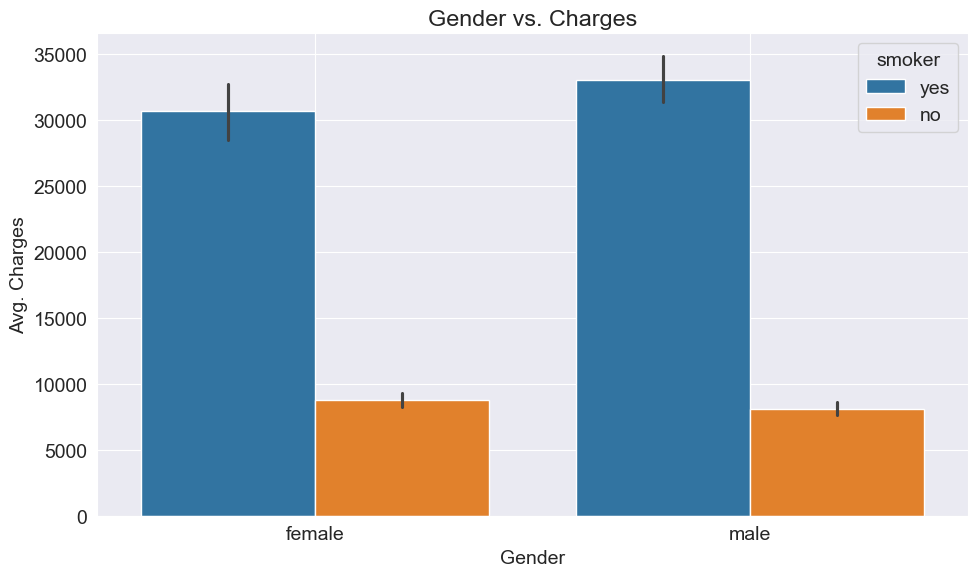

In [75]:
sns.barplot(data = medical_df,
            x = "sex",
            y = "charges",
            hue = "smoker")
plt.xlabel("Gender")
plt.ylabel("Avg. Charges")
plt.title("Gender vs. Charges")
plt.tight_layout()
plt.grid(True)
plt.show()

#### Correlation

In [76]:
# Age and Charges correlation
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [77]:
# BMI and Charges correlation
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

To compute correlation for categorical columns, they must be first converted into numerical columns

In [78]:
smoker_value = {
    "no": 0,
    "yes": 1
}

smoker_numeric = medical_df.smoker.map(smoker_value)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [80]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
# Retrieving all the columns with data type that is not object

# Initiating an empty list
cols = []

# Looping through all the columns
for col in medical_df.columns:
    if medical_df[col].dtype != "object":
        cols.append(col)

In [90]:
medical_df[cols].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


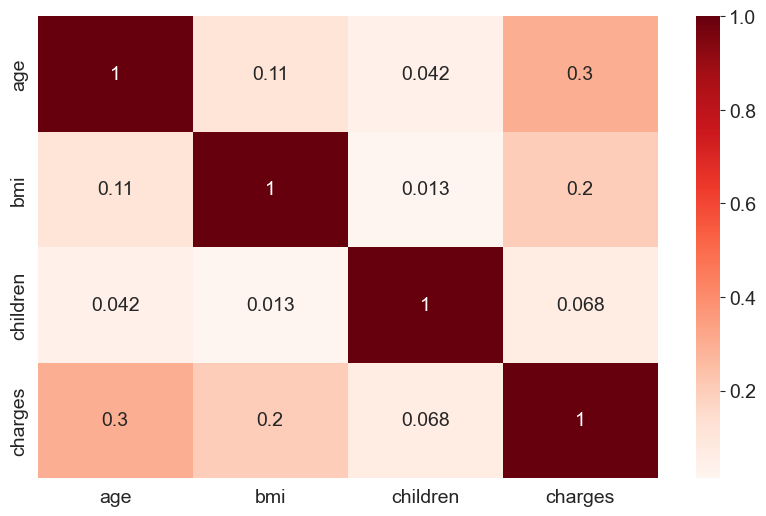

In [95]:
sns.heatmap(medical_df[cols].corr(),
            cmap = "Reds",
            annot = True)

plt.show()

#### Linear Reression using a single Feature

In [100]:
non_smokers = medical_df[medical_df.smoker == "no"]

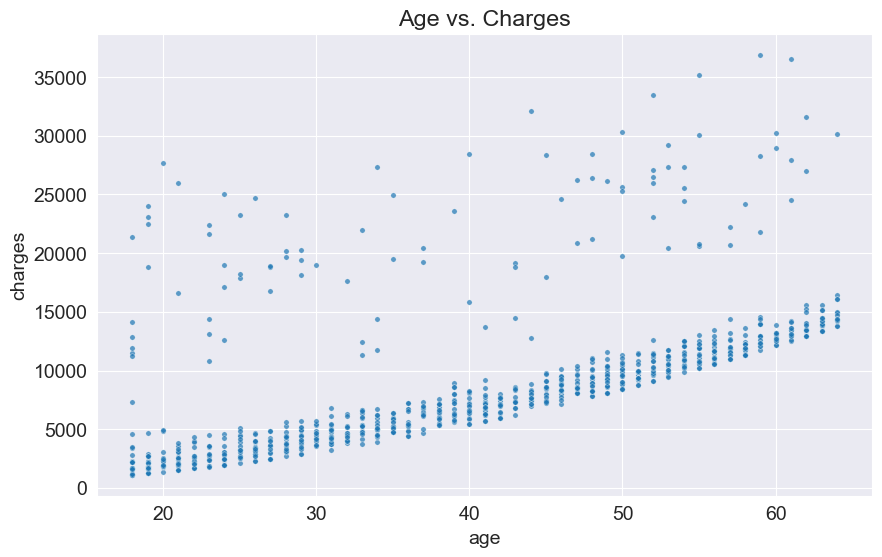

In [101]:
sns.scatterplot(
    data = non_smokers,
    x = "age",
    y = "charges",
    alpha = 0.7,
    s = 15
)

plt.title("Age vs. Charges")
plt.show()

In [102]:
def estimate_charge(age, w, b):
    return w * age + b

In [103]:
w = 50
b = 100

In [104]:
ages = non_smokers.age
estimate_charges = estimate_charge(ages, w, b)

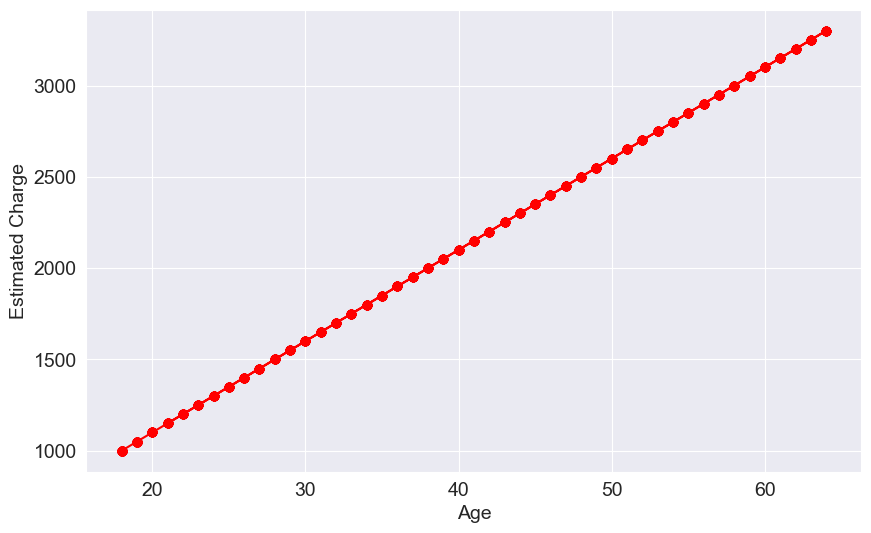

In [105]:
plt.plot(ages, estimate_charges, "r-o")
plt.xlabel("Age")
plt.ylabel("Estimated Charge")
plt.show()

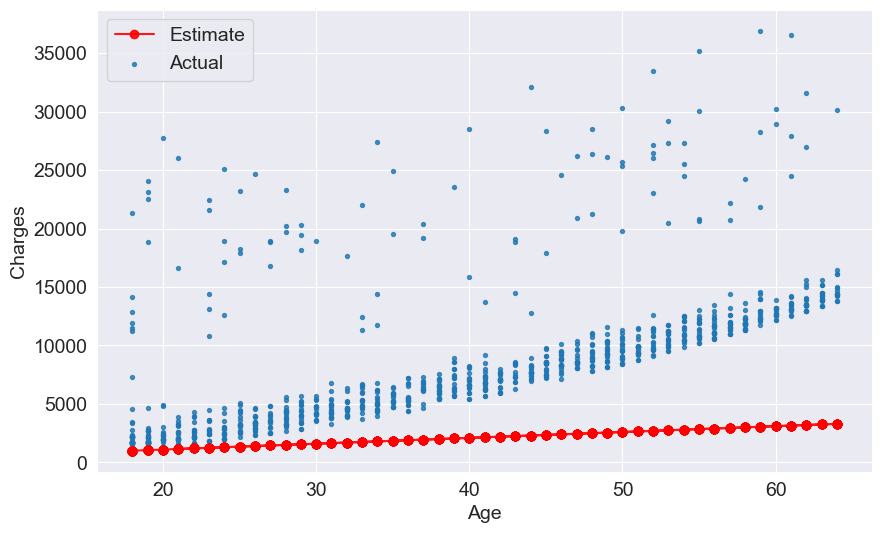

In [107]:
target = non_smokers.charges

plt.plot(ages, estimate_charges, "r-o", alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])
plt.show()

In [111]:
def try_parameters(w, b):
    ages = non_smokers.age
    target = non_smokers.charges

    estimated_charges = estimate_charge(ages, w, b)

    plt.plot(ages, estimated_charges, "r-o", alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])
    plt.show()

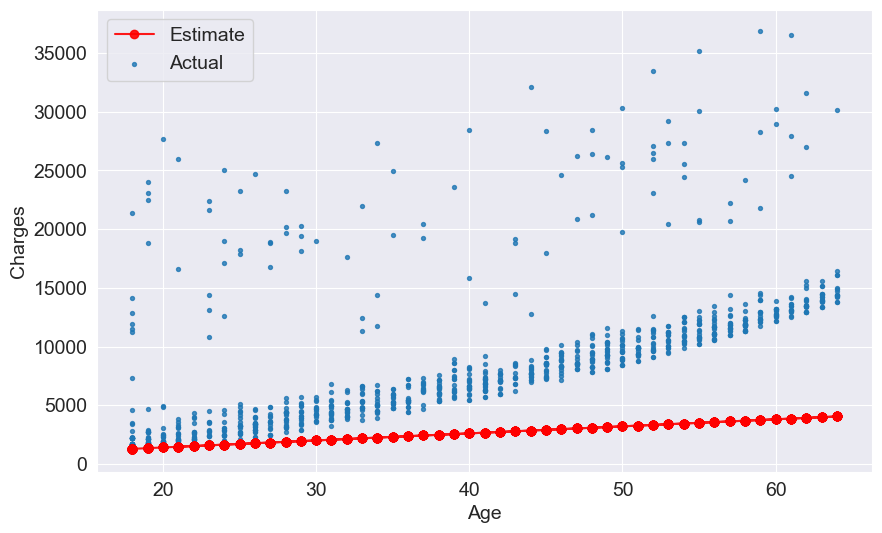

In [112]:
try_parameters(60, 200)

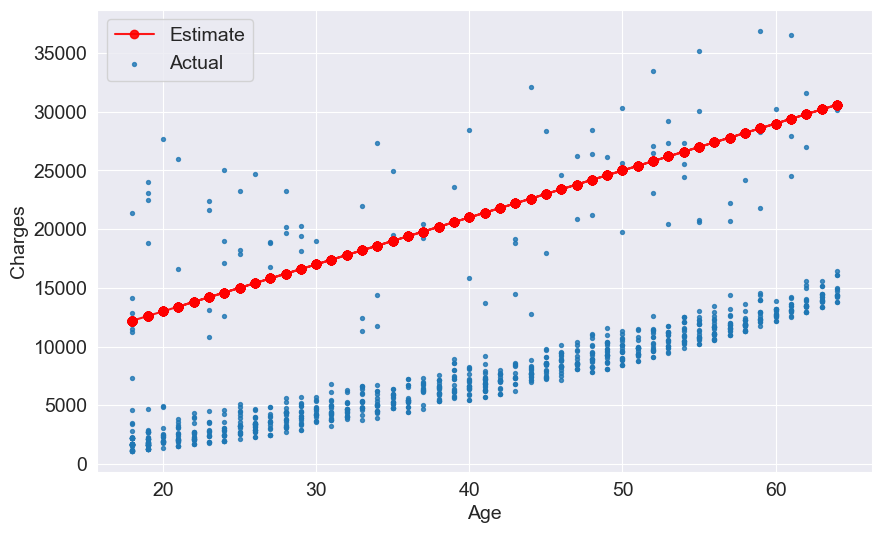

In [113]:
try_parameters(400, 5000)

#### Loss/Cost Function

In [114]:
import numpy as np

In [115]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [116]:
w = 50
b = 100

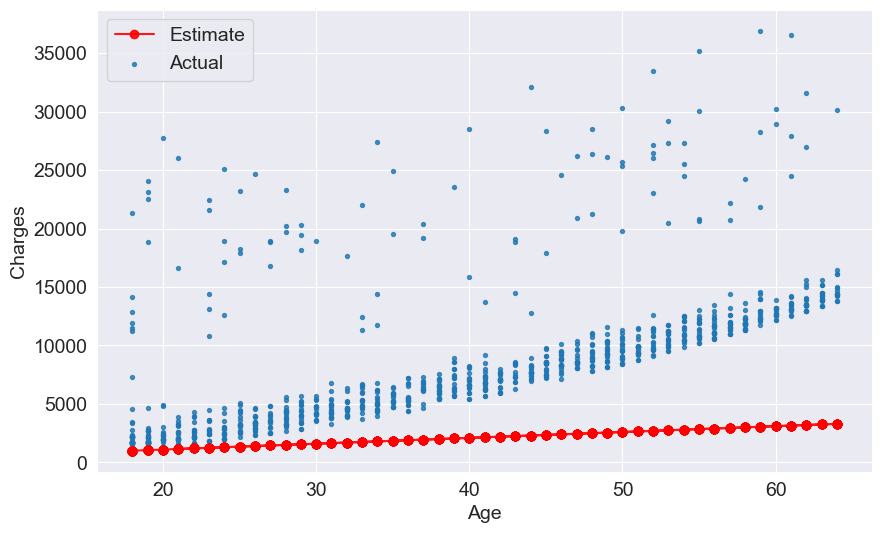

In [117]:
try_parameters(w, b)

In [120]:
targets = non_smokers["charges"]
predicted = estimate_charge(non_smokers.age, w, b)

In [121]:
rmse(targets, predicted)

8461.949562575493

In [124]:
def try_parameters(w, b):
    ages = non_smokers.age
    target = non_smokers.charges

    estimated_charges = estimate_charge(ages, w, b)

    plt.plot(ages, estimated_charges, "r-o", alpha = 0.9)
    plt.scatter(ages, target, s = 8, alpha = 0.8)
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])

    loss = rmse(targets = target, predictions = estimated_charges)
    print(f"RMSE loss: {loss}")

RMSE loss: 8461.949562575493


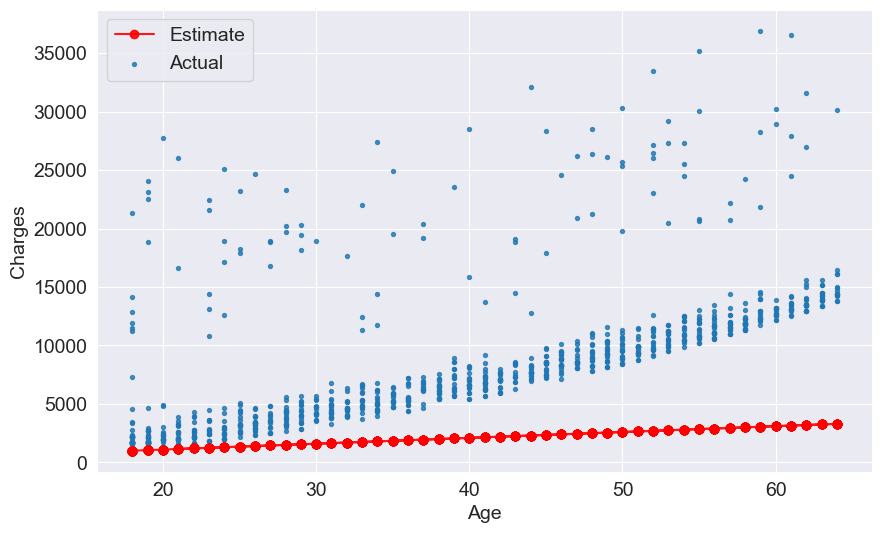

In [125]:
try_parameters(w, b)

RMSE loss: 4778.197917926803


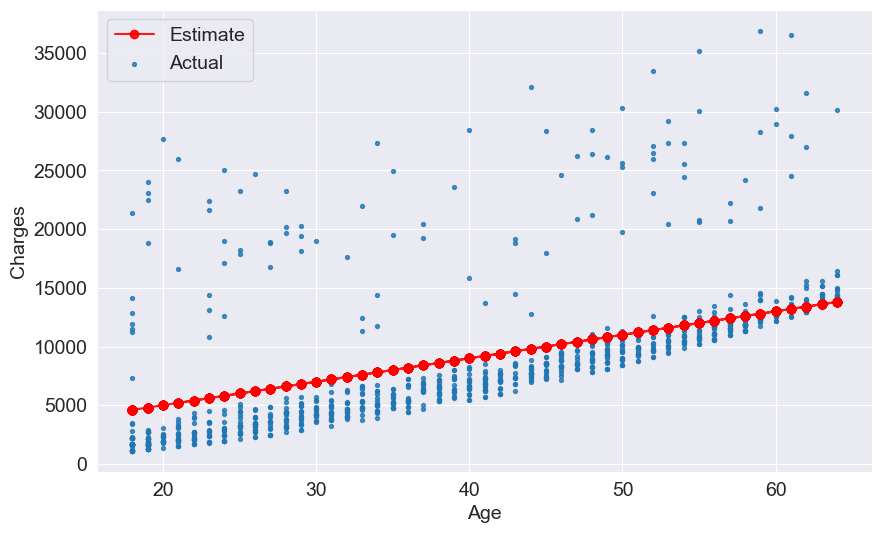

In [126]:
try_parameters(200, 1000)

#### Optimizer

Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

- Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
- Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

#### Linear Regression sing Sci-kit Learn

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
model = LinearRegression()

In [129]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [130]:
inputs = non_smokers[["age"]]
targets = non_smokers.charges

In [131]:
print(f"Inputs shape: {inputs.shape}")
print(f"Targets shape: {targets.shape}")

Inputs shape: (1064, 1)
Targets shape: (1064,)


In [132]:
model.fit(inputs, targets)

LinearRegression()

In [133]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [134]:
predictions = model.predict(inputs)

In [135]:
rmse(targets = targets, predictions = predictions)

4662.505766636395

In [136]:
model.coef_

array([267.24891283])

In [137]:
model.intercept_

-2091.4205565650864

RMSE loss: 4662.505766636395


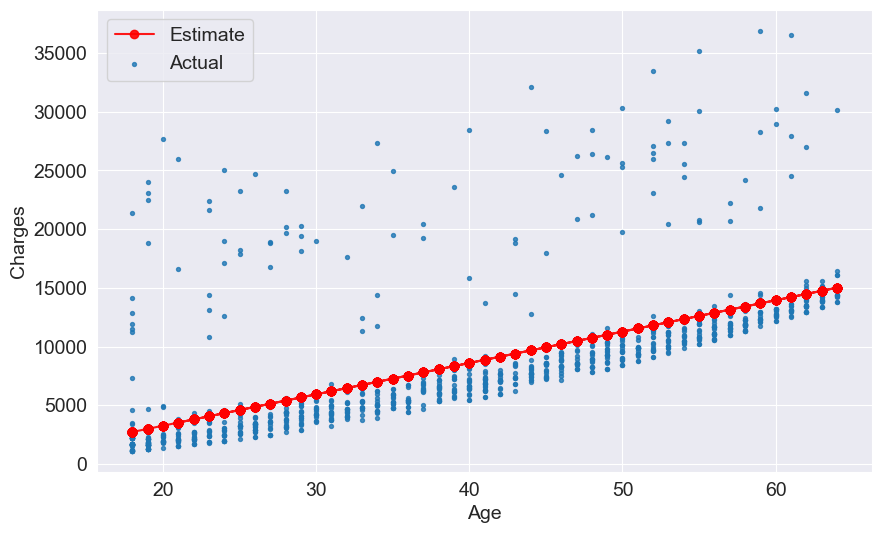

In [138]:
try_parameters(model.coef_, model.intercept_)

In [139]:
from sklearn.linear_model import SGDRegressor

In [153]:
model = SGDRegressor(loss = "squared_error", penalty = "l2", alpha = 0.01, l1_ratio = 0.6)

In [154]:
model.fit(inputs, targets)

SGDRegressor(alpha=0.01, l1_ratio=0.6)

In [155]:
predictions = model.predict(inputs)

RMSE loss: 4860.793310387013


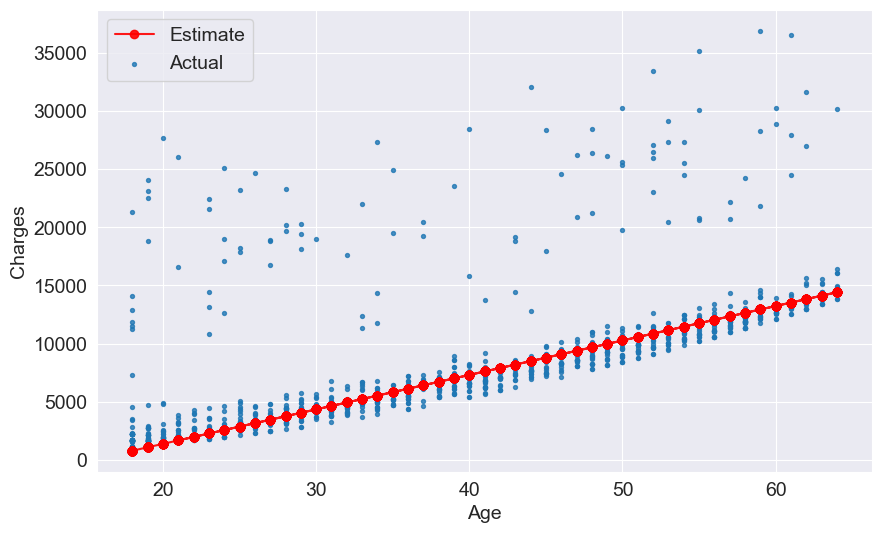

In [156]:
try_parameters(model.coef_, model.intercept_)

#### Linear Regression using Multiple Variables

First, we will just use 2 features

In [158]:
inputs, targets = non_smokers[["age", "bmi"]], non_smokers["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 4662.3128354612945


Adding another feature

In [159]:
inputs, targets = non_smokers[["age", "bmi", "children"]], non_smokers["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 4608.470405038246


Now, applying linear regression on the whole dataset

In [162]:
inputs, targets = medical_df[["age", "bmi", "children"]], medical_df["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 11355.317901125973


Using categorical features

<Axes: xlabel='smoker', ylabel='charges'>

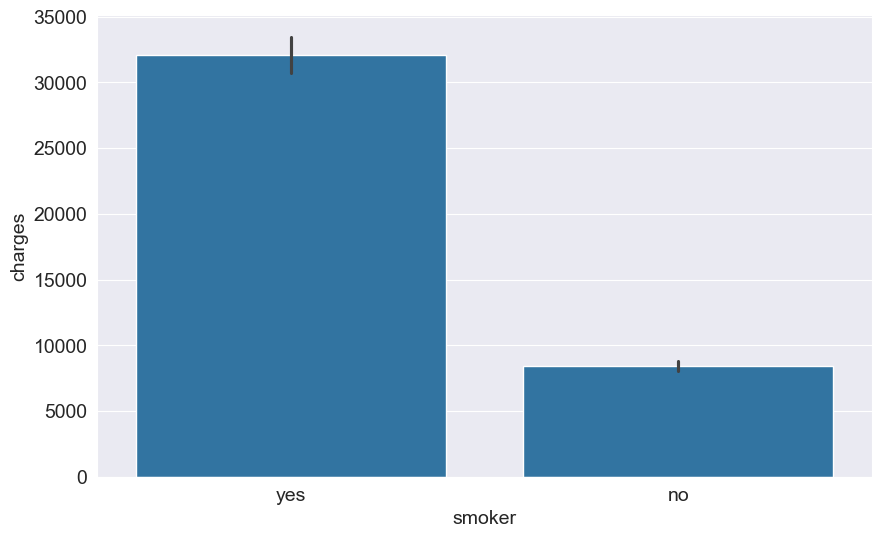

In [165]:
sns.barplot(data = medical_df, x = "smoker", y = "charges")

In [166]:
smoker_codes = {
    "no": 0,
    "yes": 1
}

medical_df["smoker_code"] = medical_df["smoker"].map(smoker_codes)

In [167]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984778

In [170]:
inputs, targets = medical_df[["age", "bmi", "children", "smoker_code"]], medical_df["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 6056.439217188081


In [171]:
sex_codes = {
    "female": 0,
    "male": 1
}

medical_df["sex_code"] = medical_df["sex"].map(sex_codes)

In [172]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202533

The correlation is very small so, the impact of this column on the output will be very low

In [173]:
inputs, targets = medical_df[["age", "bmi", "children", "smoker_code", "sex_code"]], medical_df["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 6056.100708754546


##### One-hot encoding

<Axes: xlabel='region', ylabel='charges'>

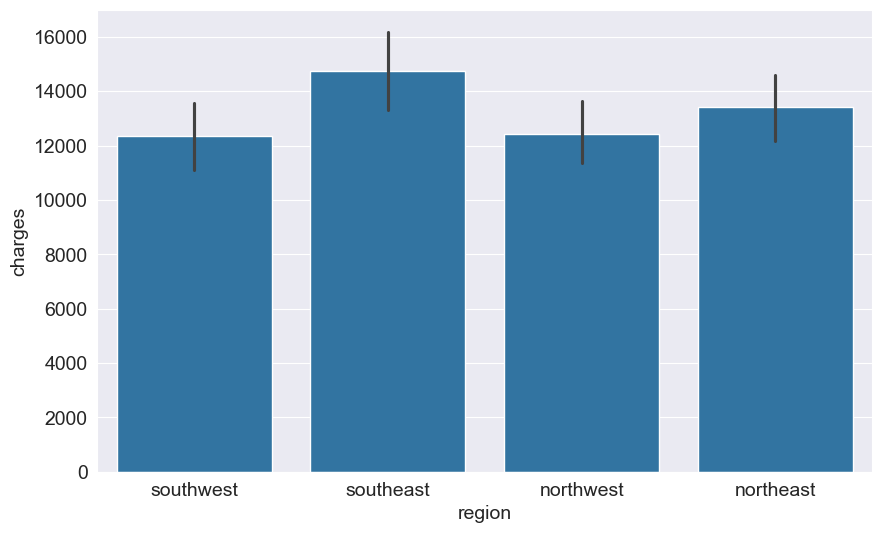

In [174]:
sns.barplot(data = medical_df, x = "region", y = "charges")

In [175]:
from sklearn.preprocessing import OneHotEncoder

In [176]:
enc = OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [177]:
one_hot = enc.transform(medical_df[["region"]]).toarray()

In [178]:
medical_df[["northeast", "northwest", "southeast", "southwest"]] = one_hot

In [179]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [182]:
inputs, targets = medical_df[["age", "bmi", "children", "smoker_code", "sex_code", "northeast", "northwest", "southeast", "southwest"]], medical_df["charges"]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print(f"Loss: {loss}")

Loss: 6041.6796511744515


In [184]:
input_cols = ["age", "bmi", "children", "smoker_code", "sex_code", "northeast", "northwest", "southeast", "southwest"]

weights_df = pd.DataFrame({
    "feature": np.append(input_cols, 1),
    "weight": np.append(model.coef_, model.intercept_)
})

In [185]:
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


#### Standardization

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [188]:
numerical_cols = ["age", "bmi", "children"]
scaler = StandardScaler()
scaler.fit(medical_df[numerical_cols])

StandardScaler()

In [189]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [190]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [193]:
scaled_inputs = scaler.transform(medical_df[numerical_cols])
scaled_inputs[:5]

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       [-0.4419476 , -1.30553108, -0.90861367],
       [-0.51314879, -0.29255641, -0.90861367]])

In [194]:
cat_cols = ["smoker_code", "sex_code", "northeast", "northwest", "southeast", "southwest"]
categorical_data = medical_df[cat_cols].values

In [195]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

print(f"Loss: {rmse(targets, predictions)}")

Loss: 6041.679651174452


In [198]:
weights_df = pd.DataFrame({
    "Features": np.append(numerical_cols + cat_cols, 1),
    "weights": np.append(model.coef_, model.intercept_)
})

In [199]:
weights_df

,Features,weights
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,8466.483215


In [200]:
weights_df.sort_values("weights", ascending = False)

,Features,weights
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814
